In [1]:
%load_ext autoreload
%autoreload 2
from sage.all import *
from utility import *

Pi = sage.symbolic.constants.pi

In [2]:
# Define here the equation defining your affine variety.
x,y,z,w = var('x, y, z, w', domain=CC)

X= x^3*z^2 + 3*x^2*z + 3*x - y^2*z - 2*y -1


# Defining the Lefschetz Bifibration

## The fibration $\pi$

The fibre over t in C is (t - 20*x - 3*y)^2*x^3 + 3*(t - 20*x - 3*y)*x^2 - (t - 20*x - 3*y)*y^2 + 3*x - 2*y - 1 == 0
The model fibre over 0 is (20*x + 3*y)^2*x^3 - 3*(20*x + 3*y)*x^2 + (20*x + 3*y)*y^2 + 3*x - 2*y - 1 == 0
Critical values: 8 
Critical points: 8



(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of pi'}>)

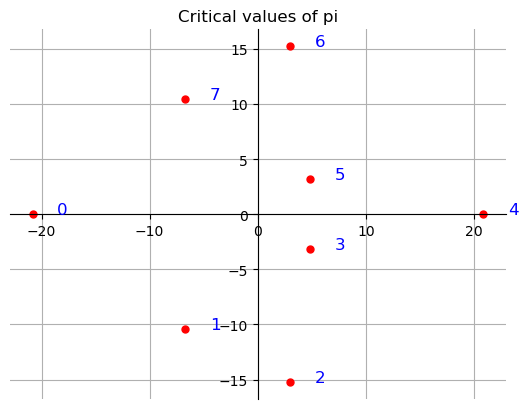

In [12]:
alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
pi = alpha*x + beta*y + gamma*z


pi = pi.subs({
    alpha: 20,
    beta: 3,
    gamma: 1
})

pi = LefschetzFibration([x,y,z], X, pi)
origin_fibre = 0
solvefor=z

t = var('t', domain=CC)

t_fibre = pi.get_fibre(t, solvefor)
print(f'The fibre over t in C is {t_fibre.simplify()==0}')
print(f'The model fibre over {origin_fibre} is {t_fibre.simplify().subs({t:origin_fibre})==0}')

crit_values_pi = sort_by_angle(pi.get_critical_values(), origin_fibre)
crit_points_pi = pi.get_critical_points()

# sorted = []
# for pt in crit_points_pi:
#    sorted.append(pt[:-1])

# # sorted = set(sorted)
# for st in sorted:
#    print(st)

# print(len(sorted))

print(f'Critical values: {len(crit_values_pi)} \nCritical points: {len(crit_points_pi)}')
print()

plot_points_ordered(crit_values_pi, 'Critical values of pi', origin_fibre=origin_fibre)

In [13]:
print(pi.get_hessian())

x
20*x + 3*y + z == t
3*x^2*z^2 + 6*x*z + 3
[
x == 1/20*t - 3/20*y - 1/20*z
]
-2*y*z - 2
[
x == 1/20*t - 3/20*y - 1/20*z
]
2*x^3*z + 3*x^2 - y^2
[
x == 1/20*t - 3/20*y - 1/20*z
]
y
20*x + 3*y + z == t
3*x^2*z^2 + 6*x*z + 3
[
y == 1/3*t - 20/3*x - 1/3*z
]
-2*y*z - 2
[
y == 1/3*t - 20/3*x - 1/3*z
]
2*x^3*z + 3*x^2 - y^2
[
y == 1/3*t - 20/3*x - 1/3*z
]
z
20*x + 3*y + z == t
3*x^2*z^2 + 6*x*z + 3
[
z == t - 20*x - 3*y
]
-2*y*z - 2
[
z == t - 20*x - 3*y
]
2*x^3*z + 3*x^2 - y^2
[
z == t - 20*x - 3*y
]
[6*x*z^2 + 6*z             0 6*x^2*z + 6*x]
[            0          -2*z          -2*y]
[6*x^2*z + 6*x          -2*y         2*x^3]


### Criticality at Infinity

In [37]:
print(intersection_summary(pi))
intersection = intersection_at_infinity(pi)

for point in intersection:
    print(kernels(pi, point))
    print(point)

fibre_boundary = pi.get_fibre_boundary_components(origin_fibre, solvefor)
print(f'The fibration has {len(fibre_boundary)} boundary components, coming from the following intersections at infinity in projective space:')
print(fibre_boundary)

The hyperplane at infinity is given by 1.00000000000000*x^3*z^2 == 0.
The fibration vanishes at [20.0000000000000*x + 1.00000000000000*z == 0].
Their intersection consists of [{x: 0, y: 1, z: 0, w: 0}].
None
Vector space of degree 4 and dimension 2 over Symbolic Ring
Basis matrix:
[ 1.00000000000000                 0 -20.0000000000000                 0]
[                0                 1                 0                 0]
{x: 0, y: 1, z: 0, w: 0}
The fibration has 1 boundary components, coming from the following intersections at infinity in projective space:
[{x: 0, y: 1, w: 0}]


## The fibration $\rho$

The expression of rho over t in C is -x + 0.0100000000000000*y
Critical values: 10
Critical points: 10


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of rho'}>)

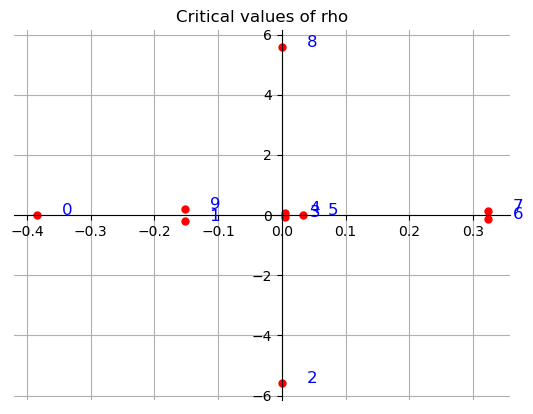

In [45]:
ar = var('ar', domain=CC)
br = var('br', domain=CC)

rho = ar*x + br*y

# theta1, theta2 = var('theta1, theta2', domain=CC)
# r1, r2 = var('r1, r2', domain=CC)

# rho = rho.subs({ar: r1*e^(I*theta1), br: r2*e^(I*theta2)})
# rho = rho.subs({r1: 0, r2: 1.0, theta1: 0, theta2: 0})

rho = rho.subs({ar: -1, br: 0.01})
origin_fibre_rho = 0.1*I

rho_t = rho.subs(solvefor == t_fibre)
rho_0 = rho_t.subs(t==origin_fibre)

rho = LefschetzFibration([x,y], t_fibre.subs(t==origin_fibre), rho_0)

crit_points_rho = rho.get_critical_points()
crit_values_rho = sort_by_angle(rho.get_critical_values(), origin_fibre_rho)


# Somehow crit values is bugging out

# a = var('a', domain=CC)
# constraints = [rho.domain==0]
# gradient_constraints = [rho.domain.diff(variable) == a*rho.fibration.diff(variable) for variable in rho.variables]
# a_solved = solve(gradient_constraints[0], a)[0]
# b = gradient_constraints[0]
# gradient_constraints = [constraint.lhs() - constraint.rhs().subs(a_solved) ==0 for constraint in gradient_constraints[1:]]
# constraints.extend(gradient_constraints)
# print(constraints)

# crit_points_rho = solve(constraints, rho.variables)
# crit_points_rho = [[expression.lhs() == expression.rhs().n() for expression in solution] for solution in crit_points_rho]
# crit_values_rho = sort_by_angle([rho(cpoint) for cpoint in crit_points_rho])

# print(crit_points_rho)

print(f'The expression of rho over t in C is {rho_t}')
print(f'Critical values: {len(crit_values_rho)}')
print(f'Critical points: {len(crit_points_rho)}')
plot_points_ordered(crit_values_rho, origin_fibre=origin_fibre_rho, title="Critical values of rho")


### Vanishing Cycles of Rho

#### Origin Fibre

1/25000000*(y - 10.0*I)^5 - 3/50000*(y - 10.0*I)^3 + 1/5*(y - 10.0*I)*y^2 - 197/100*y - 1.0 - 0.3*I
[-3.38377508e-01-2.48087287e-01j -7.29564024e-02+8.87180131e+00j
  4.89311560e-07+2.25569335e+03j  5.11703206e-07-2.21568661e+03j
  4.11332909e-01+1.36954173e+00j]


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Fibre over 0 of rho'}>)

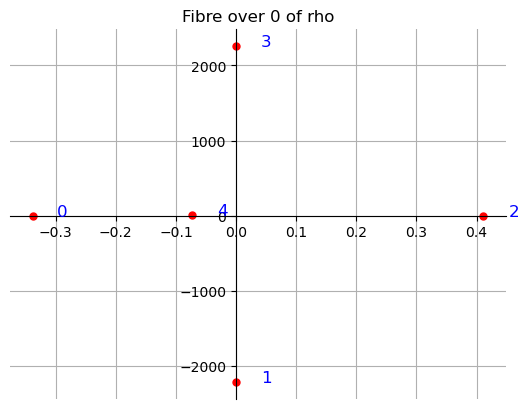

In [49]:
solvefor_rho = x

t_fibre_rho = rho.get_fibre(t,solvefor_rho)
fibre_rho_0 = t_fibre_rho.subs(t==origin_fibre_rho)
print(fibre_rho_0.simplify())

sols = NumericalRoots(fibre_rho_0)
print(sols)

plot_points_ordered(sols, origin_fibre=origin_fibre_rho, title="Fibre over 0 of rho")


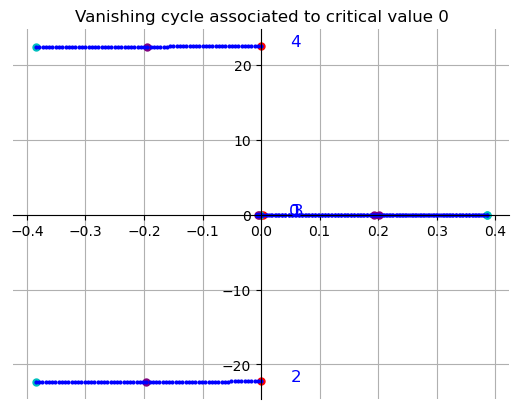

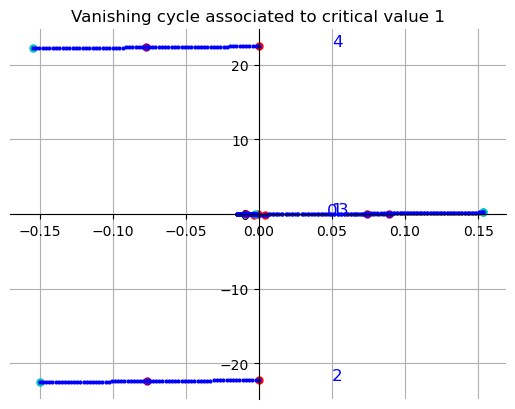

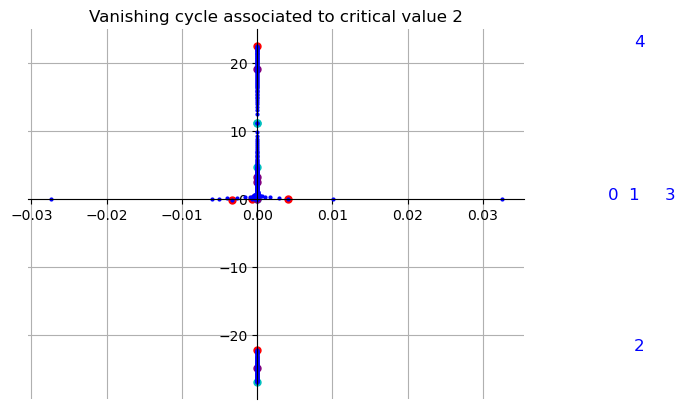

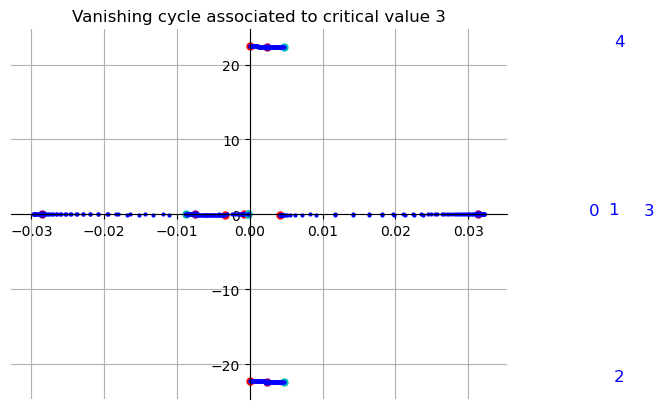

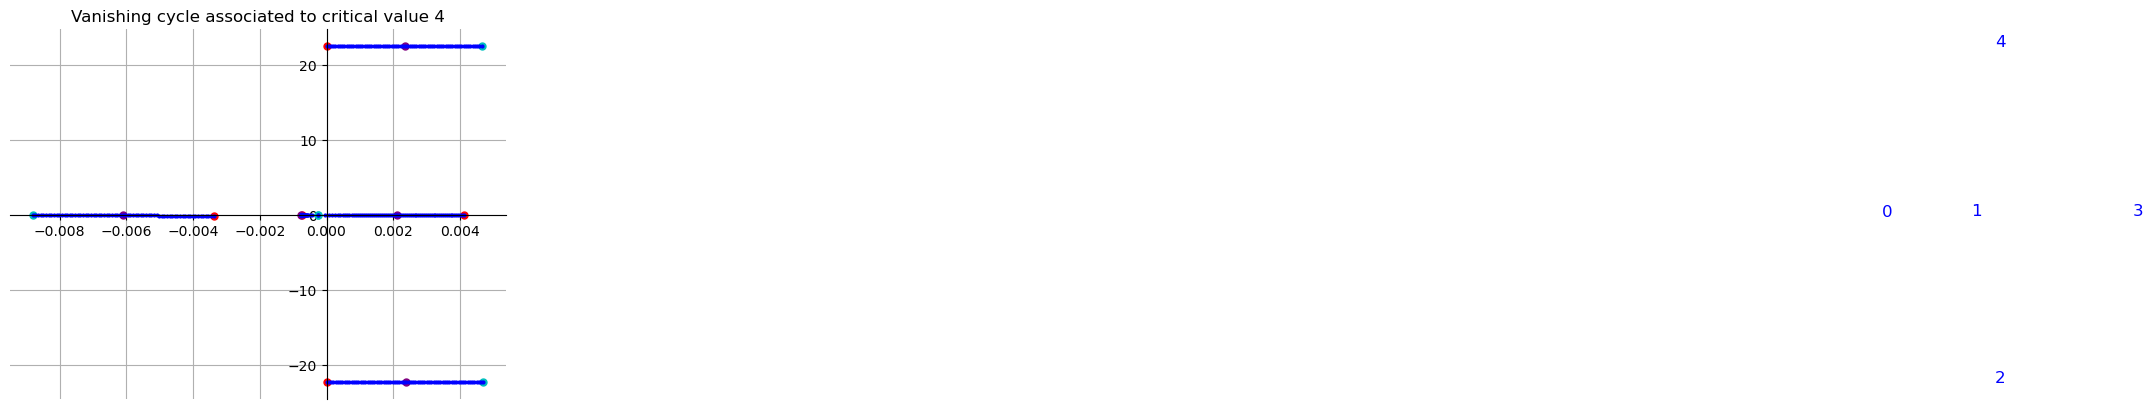

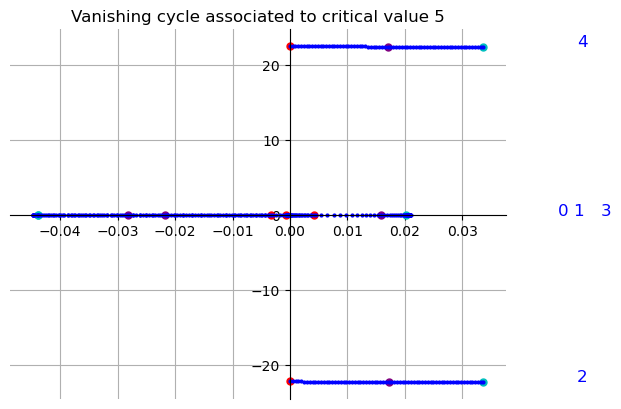

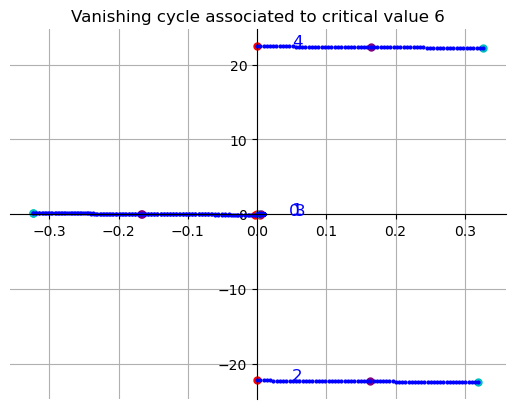

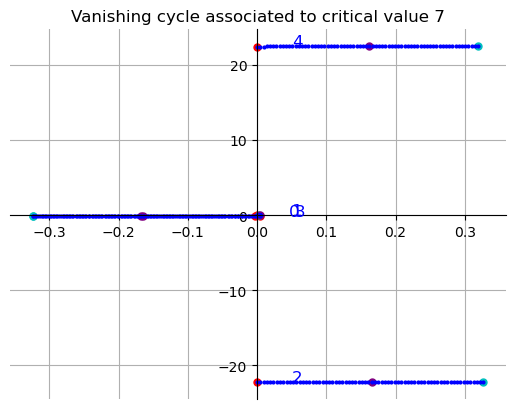

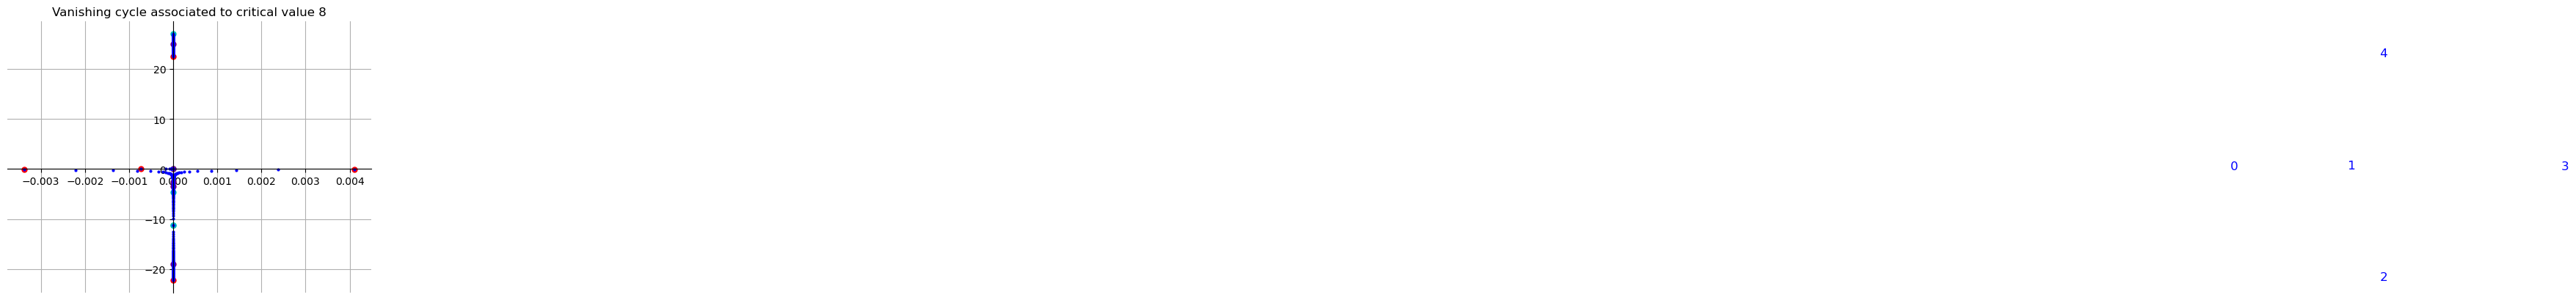

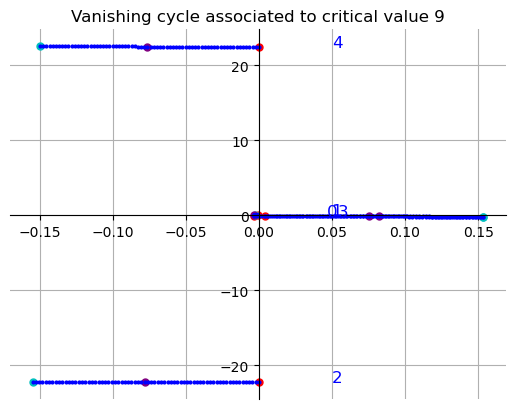

In [47]:
for (index, point) in enumerate(crit_values_rho):
    path = pl_path([origin_fibre_rho, point])
    trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Vanishing cycle associated to critical value {index}', origin_fibre=origin_fibre_rho)    
    # print(index, point)

## Matching Paths - Images of Vanishing Cycles

In [27]:
color = color_generator(len(crit_values_pi))


for index, crit in enumerate(crit_values_pi):
    matching = pi.get_matching_path(rho_0, origin_fibre, crit, solvefor=solvefor, split=True)
    plot_path_3d(matching[0], title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

In [93]:
from collections import deque


# Define the Dehn twist mappings
dehn_twist_map = {
    ('a', 'b'): 'c',  # Example: Dehn twist of 'b' along 'a' gives 'c'
    ('b', 'a'): 'c',  # Example: Dehn twist of 'a' along 'b' gives 'c'
    ('a', 'c'): 'b',  # Add all necessary mappings
    ('c', 'a'): 'b',
    ('b', 'c'): 'a',
    ('c', 'b'): 'a'
}

def dehn_twist(word, k):
    # Apply the Dehn twist according to the given mappings
    if (word[k], word[k+1]) in dehn_twist_map:
        twisted = dehn_twist_map[(word[k], word[k+1])]
    else:
        twisted = word[k+1]  # Default to the adjacent element if no mapping exists

    new_word = word[:k] + (twisted, word[k]) + word[k+2:]
    return new_word

def hurwitz_move(word, k):
    # Perform the Hurwitz move at position k
    if k < 0 or k >= len(word) - 1:
        raise ValueError("Invalid position for Hurwitz move.")
    new_word = dehn_twist(word, k)
    return new_word

def generate_hurwitz_equivalent_words(word):
    word = tuple(word)  # Convert word to tuple for immutability
    queue = deque([word])
    seen = set(queue)

    while queue:
        current_word = queue.popleft()
        for i in range(len(word) - 1):
            new_word = hurwitz_move(current_word, i)
            if new_word not in seen:
                seen.add(new_word)
                queue.append(new_word)

    return seen

def is_cyclic_permutation(word1, word2):
    if len(word1) != len(word2):
        return False
    doubled_word = word2 * 2
    return any(doubled_word[i:i+len(word1)] == word1 for i in range(len(word2)))

def remove_cyclic_permutations(words):
    unique_words = []
    while words:
        word = words.pop()
        if not any(is_cyclic_permutation(word, w) for w in unique_words):
            unique_words.append(word)

    stringified_words = [''.join(word) for word in unique_words]


    return stringified_words
    

In [94]:
word = 'abcabc'
equivalent_words = generate_hurwitz_equivalent_words(word)
unique_representatives = remove_cyclic_permutations(list(equivalent_words))

print("Unique Hurwitz equivalent words (one per cyclic permutation orbit):")
for w in unique_representatives:
    print(w)

Unique Hurwitz equivalent words (one per cyclic permutation orbit):
baacba
cbcbcb
cabbac
aabaab
aaccaa
aababc
cbacba
bbabcb
acabbb
acccca
abbcab
cbabbb
acacac
aabbaa
ccbaab
cbbbca
ccbabc
bcbbcb
acacba
aacaac
bccabc
bccbcc
acbcbb
bbbccb
bccaab
cabcca
ccacbc
cccaba
aacaba
bbbbaa
bcabca
aacbca
cbaaab
abbabb
cbaccb
abacbb
ccbcac
caccac
cccbbc
cabbcb
cbbaac
caccba
bcaacb
abcaca
caaaba
bababa


In [99]:
all_containers = unique_representatives.copy()

def count(word, letter):
    return sum(1 for l in word if l == letter)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)

for w in all_containers:
    if count(w, 'a') != 2 or count(w, 'b') != 2 or count(w, 'c') != 2:
        all_containers.remove(w)


for w in all_containers:
    print(w)

print(len(unique_representatives))



cabbac
cbacba
ccbaab
bccaab
bcabca
cbbaac
bcaacb
46
